<a href="https://colab.research.google.com/github/DumbMachine/CV_Implementation/blob/master/Vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.core import Flatten, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D

In [2]:
import sys
import keras 
print("Python Version : {}".format(sys.version))
print("Keras Version : {}".format(keras.__version__))

Python Version : 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Keras Version : 2.2.4


In [3]:
#loading the data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 49s 0us/step


In [4]:
#Dimension of the training and test dataset
print("Dimensions of Training Data: {}".format(x_train.shape))
print("Dimensions of Test Data: {}".format(x_test.shape))

Dimensions of Training Data: (50000, 32, 32, 3)
Dimensions of Test Data: (10000, 32, 32, 3)


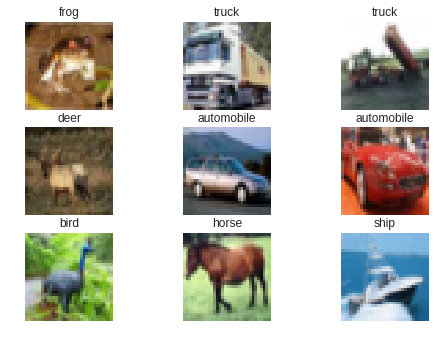

In [5]:

labelDict = {
    0:"airplanes",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
    }
#ploting some images
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.title(labelDict[y_train[i][0]])
    plt.axis('off')
    img = x_train[i]
    plt.imshow(img)
    
plt.show()

In [0]:

#Preprocessing the datasets

#random seed for consistent results
seed = 6
np.random.seed(seed)

#loading the data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

#Noramalizing the dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255.0
x_test/=255.0

In [7]:
#labels
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [8]:

#one hot encoding the labels
y_trian = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_class = y_test.shape

print(y_train.shape)
print(y_test[0])

(50000, 1)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


![Model](http://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png)
#Implementation of Vgg16

In [0]:
def vgg16(weights = None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    if weights:
        model.load_weights(weights)

    return model

In [13]:

#hyperpaparmets
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

model = vgg16()

sgd = SGD(lr=learning_rate , decay = weight_decay , momentum=momentum, nesterov= True)
model.compile(loss='categorical_crossentropy' , optimizer= sgd , metrics =['accuracy'])

#Summary of the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [14]:
epochs = 10
batch_size = 32

history = model.fit(x_train,y_trian , validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size , verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 147s 3ms/step - loss: 2.3040 - acc: 0.0995 - val_loss: 2.3036 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 141s 3ms/step - loss: 2.2709 - acc: 0.1182 - val_loss: 2.2889 - val_acc: 0.1570
Epoch 3/10
50000/50000 [==============================] - 141s 3ms/step - loss: 1.9396 - acc: 0.2537 - val_loss: 1.6575 - val_acc: 0.3705
Epoch 4/10
50000/50000 [==============================] - 141s 3ms/step - loss: 1.4306 - acc: 0.4703 - val_loss: 1.3120 - val_acc: 0.5353
Epoch 5/10
50000/50000 [==============================] - 141s 3ms/step - loss: 1.1033 - acc: 0.6081 - val_loss: 1.0238 - val_acc: 0.6472
Epoch 6/10
50000/50000 [==============================] - 141s 3ms/step - loss: 0.8954 - acc: 0.6901 - val_loss: 0.9013 - val_acc: 0.6836
Epoch 7/10
50000/50000 [==============================] - 141s 3ms/step - loss: 0.7382 - acc: 0.7483 - val_loss: 0.8456 - 

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6952318350791931
Test accuracy: 0.78


In [16]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


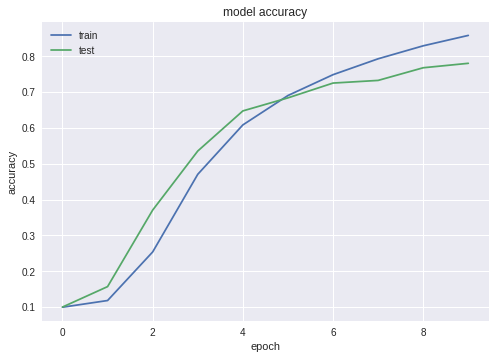

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

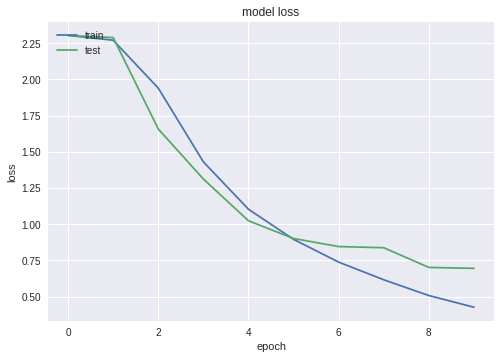

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

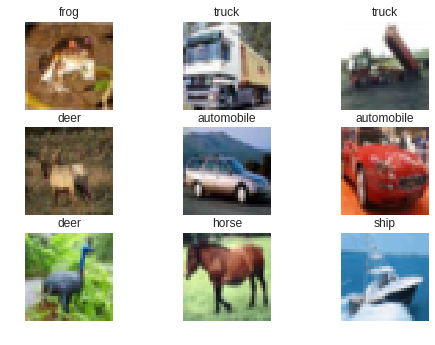

In [20]:
#Testing
for i in range(0,9):
    pred = model.predict(x_train[i].reshape(1,32,32,3)).reshape(10).tolist()
    plt.subplot(330+1+i)
    plt.title(labelDict[pred.index(max(pred))])
    plt.axis('off')
    img = x_train[i]
    plt.imshow(img)
    
plt.show()

In [0]:
#Saving the model as .h5 file
model.save("keras-cifar10.h5")
#Saving the model as .json file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [22]:
!ls

keras-cifar10.h5  model.json  sample_data
